In [3]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv(r"C:\Users\hp\Desktop\iot_telemetry_data - manuplated data.csv")
data

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.590000e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,NaN,22.700000
1,1.590000e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.590000e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.590000e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.590000e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
...,...,...,...,...,...,...,...,...,...
405179,1.600000e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001
405180,1.600000e+09,b8:27:eb:bf:9d:51,0.005882,48.500000,False,0.008660,False,0.023301,22.200000
405181,1.600000e+09,1c:bf:ce:15:ec:4d,0.004540,75.699997,True,0.007181,False,0.019076,26.600000
405182,1.600000e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001


In [5]:
data.shape

(405184, 9)

# filling the null values

In [6]:
data.corr()

,ts,co,humidity,light,lpg,motion,smoke,temp
ts,1.000000,0.064784,0.012773,-0.023389,0.062868,-0.002020,0.063253,0.073560
co,0.064784,1.000000,-0.656750,-0.230197,0.997331,-0.000706,0.998192,0.110905
humidity,0.012773,-0.656750,1.000000,0.079703,-0.672113,-0.009826,-0.669863,-0.410427
light,-0.023389,-0.230197,0.079703,1.000000,-0.208926,0.033594,-0.212967,0.747485
lpg,0.062868,0.997331,-0.672113,-0.208926,1.000000,0.000232,0.999916,0.136396
motion,-0.002020,-0.000706,-0.009826,0.033594,0.000232,1.000000,0.000062,0.037649
smoke,0.063253,0.998192,-0.669863,-0.212967,0.999916,0.000062,1.000000,0.131891
temp,0.073560,0.110905,-0.410427,0.747485,0.136396,0.037649,0.131891,1.000000


In [7]:
# from this we understand "co"and "smoke" are highly correlated

In [8]:
data.isna().sum()

ts          0
device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       5
temp        0
dtype: int64

In [9]:
# so we use "co " as the base for filling the null  values in smoke colummn

In [10]:
null_data=data[data.isnull().any(axis=1)]
null_data

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.590000e+09,b8:27:eb:bf:9d:51,0.004956,51.0,False,0.007651,False,NaN,22.7
16,1.590000e+09,b8:27:eb:bf:9d:51,0.004976,50.9,False,0.007673,False,NaN,22.6
22,1.590000e+09,b8:27:eb:bf:9d:51,0.004952,50.8,False,0.007646,False,NaN,22.6
24,1.590000e+09,b8:27:eb:bf:9d:51,0.004962,50.9,False,0.007657,False,NaN,22.6
43,1.590000e+09,b8:27:eb:bf:9d:51,0.004942,50.9,False,0.007635,False,NaN,22.6


In [11]:
data3=data[(data['co']>0.004942) & (data['co']<0.004976)]
data3

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.590000e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,NaN,22.7
4,1.590000e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.6
9,1.590000e+09,b8:27:eb:bf:9d:51,0.004970,50.900000,False,0.007667,False,0.020457,22.6
10,1.590000e+09,b8:27:eb:bf:9d:51,0.004960,50.900000,False,0.007656,False,0.020425,22.6
12,1.590000e+09,b8:27:eb:bf:9d:51,0.004972,50.900000,False,0.007668,False,0.020461,22.6
...,...,...,...,...,...,...,...,...,...
356487,1.600000e+09,1c:bf:ce:15:ec:4d,0.004968,54.799999,True,0.007664,False,0.020449,29.6
356490,1.600000e+09,1c:bf:ce:15:ec:4d,0.004968,54.799999,True,0.007664,False,0.020449,29.6
356507,1.600000e+09,1c:bf:ce:15:ec:4d,0.004968,54.700001,True,0.007664,False,0.020449,29.6
356517,1.600000e+09,1c:bf:ce:15:ec:4d,0.004968,54.700001,True,0.007664,False,0.020449,29.6


In [12]:
data4=data3['smoke'].median()
data4

0.020414179

In [13]:
for i in ['smoke']:
    data[i]=data[i].fillna(data4)
data

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.590000e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020414,22.700000
1,1.590000e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.590000e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.590000e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.590000e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
...,...,...,...,...,...,...,...,...,...
405179,1.600000e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001
405180,1.600000e+09,b8:27:eb:bf:9d:51,0.005882,48.500000,False,0.008660,False,0.023301,22.200000
405181,1.600000e+09,1c:bf:ce:15:ec:4d,0.004540,75.699997,True,0.007181,False,0.019076,26.600000
405182,1.600000e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001


In [14]:
data.isna().sum()

ts          0
device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
dtype: int64

# encoding of data

In [15]:
#label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
binary_features= ['light','motion','device']   

for i in binary_features:
    label_encoders[i] = LabelEncoder()
    data[i] = label_encoders[i].fit_transform(data[i])  
  

In [16]:
data

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.590000e+09,2,0.004956,51.000000,0,0.007651,0,0.020414,22.700000
1,1.590000e+09,0,0.002840,76.000000,0,0.005114,0,0.013275,19.700001
2,1.590000e+09,2,0.004976,50.900000,0,0.007673,0,0.020475,22.600000
3,1.590000e+09,1,0.004403,76.800003,1,0.007023,0,0.018628,27.000000
4,1.590000e+09,2,0.004967,50.900000,0,0.007664,0,0.020448,22.600000
...,...,...,...,...,...,...,...,...,...
405179,1.600000e+09,0,0.003745,75.300003,0,0.006247,0,0.016437,19.200001
405180,1.600000e+09,2,0.005882,48.500000,0,0.008660,0,0.023301,22.200000
405181,1.600000e+09,1,0.004540,75.699997,1,0.007181,0,0.019076,26.600000
405182,1.600000e+09,0,0.003745,75.300003,0,0.006247,0,0.016437,19.200001


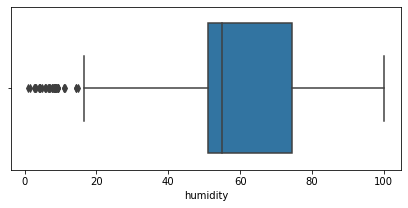

In [17]:
plt.figure(figsize=(7,3))
sns.boxplot(x=data['humidity'])
plt.show()

In [18]:
Q1=np.percentile(data['humidity'], 25, interpolation='midpoint')
Q2=np.percentile(data['humidity'], 50, interpolation='midpoint')
Q3=np.percentile(data['humidity'], 75, interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print('Q1 : ',Q1,'\n'
     'Q2 : ',Q2,'\n'
     'Q3 : ',Q3)
print('IQR : ',IQR)
print('lower-limit : ',low_limit)
print('upper-limit : ',up_limit)

Q1 :  51.0 
Q2 :  54.9 
Q3 :  74.30000305
IQR :  23.30000305
lower-limit :  16.049995425
upper-limit :  109.250007625


In [19]:
outlier=[]
for x in data['humidity']:
    if ((x<low_limit) or (x>up_limit)):
        outlier.append(x)
print('outlier values are:',outlier)

outlier values are: [7.599999905, 7.0, 6.900000095, 8.5, 8.399999619, 8.5, 8.5, 8.5, 8.0, 11.30000019, 11.10000038, 11.0, 8.199999809, 8.300000191, 2.799999952, 2.900000095, 3.299999952, 4.0, 15.0, 14.39999962, 9.300000191, 5.800000191, 1.600000024, 4.199999809, 4.400000095, 4.900000095, 9.300000191, 9.0, 8.800000191, 8.600000381, 8.800000191, 9.199999809, 2.900000095, 5.699999809, 2.700000048, 4.0, 4.400000095, 1.100000024, 6.0, 6.400000095, 6.900000095, 6.699999809, 7.599999905, 14.30000019]


In [20]:
ind1=data['humidity']>up_limit
ind1

0         False
1         False
2         False
3         False
4         False
          ...  
405179    False
405180    False
405181    False
405182    False
405183    False
Name: humidity, Length: 405184, dtype: bool

In [21]:
data.drop(data.loc[ind1].index,inplace=True)
ind2=data['humidity']<low_limit
data.drop(data.loc[ind2].index,inplace=True)

<AxesSubplot:>

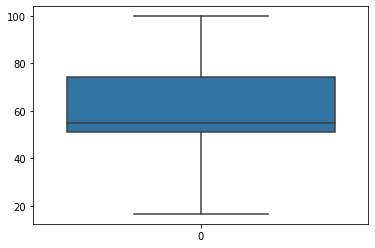

In [22]:
sns.boxplot(data=data['humidity'])

# feature reduction

In [23]:
data.corr()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
ts,1.000000,-0.002696,0.064792,0.012896,-0.023421,0.062875,-0.002019,0.063257,0.073519
device,-0.002696,1.000000,0.698927,-0.903892,-0.141952,0.714321,0.004354,0.712107,0.341384
co,0.064792,0.698927,1.000000,-0.657715,-0.230184,0.997331,-0.000707,0.998192,0.110953
humidity,0.012896,-0.903892,-0.657715,1.000000,0.080603,-0.673078,-0.009856,-0.670828,-0.410331
light,-0.023421,-0.141952,-0.230184,0.080603,1.000000,-0.208917,0.033604,-0.212959,0.747456
lpg,0.062875,0.714321,0.997331,-0.673078,-0.208917,1.000000,0.000231,0.999916,0.136442
motion,-0.002019,0.004354,-0.000707,-0.009856,0.033604,0.000231,1.000000,0.000061,0.037658
smoke,0.063257,0.712107,0.998192,-0.670828,-0.212959,0.999916,0.000061,1.000000,0.131937
temp,0.073519,0.341384,0.110953,-0.410331,0.747456,0.136442,0.037658,0.131937,1.000000


In [24]:
#smoke and lpg are highly correlated so dropping lpg column

In [25]:
data5=data.drop(columns="lpg")
data5

,ts,device,co,humidity,light,motion,smoke,temp
0,1.590000e+09,2,0.004956,51.000000,0,0,0.020414,22.700000
1,1.590000e+09,0,0.002840,76.000000,0,0,0.013275,19.700001
2,1.590000e+09,2,0.004976,50.900000,0,0,0.020475,22.600000
3,1.590000e+09,1,0.004403,76.800003,1,0,0.018628,27.000000
4,1.590000e+09,2,0.004967,50.900000,0,0,0.020448,22.600000
...,...,...,...,...,...,...,...,...
405179,1.600000e+09,0,0.003745,75.300003,0,0,0.016437,19.200001
405180,1.600000e+09,2,0.005882,48.500000,0,0,0.023301,22.200000
405181,1.600000e+09,1,0.004540,75.699997,1,0,0.019076,26.600000
405182,1.600000e+09,0,0.003745,75.300003,0,0,0.016437,19.200001


# future engineering

In [26]:
data5['pollution']=data5['co']+data5['smoke']+data5['humidity']
data5['pollution']=data5['pollution']/3
data5


,ts,device,co,humidity,light,motion,smoke,temp,pollution
0,1.590000e+09,2,0.004956,51.000000,0,0,0.020414,22.700000,17.008457
1,1.590000e+09,0,0.002840,76.000000,0,0,0.013275,19.700001,25.338705
2,1.590000e+09,2,0.004976,50.900000,0,0,0.020475,22.600000,16.975150
3,1.590000e+09,1,0.004403,76.800003,1,0,0.018628,27.000000,25.607678
4,1.590000e+09,2,0.004967,50.900000,0,0,0.020448,22.600000,16.975138
...,...,...,...,...,...,...,...,...,...
405179,1.600000e+09,0,0.003745,75.300003,0,0,0.016437,19.200001,25.106728
405180,1.600000e+09,2,0.005882,48.500000,0,0,0.023301,22.200000,16.176394
405181,1.600000e+09,1,0.004540,75.699997,1,0,0.019076,26.600000,25.241204
405182,1.600000e+09,0,0.003745,75.300003,0,0,0.016437,19.200001,25.106728


# scaling/standardisation of data

In [27]:
y=data5['temp']
x=data5.drop('temp',axis=1)
from sklearn.preprocessing import StandardScaler
x.describe()
type(x)
standardisation=StandardScaler()
x=standardisation.fit_transform(x)
x=pd.DataFrame(x)

In [28]:
x

,0,1,2,3,4,5,6,7
0,-0.645774,0.969448,0.253624,-0.838290,-0.619964,-0.034513,0.281535,-0.838423
1,-0.645774,-1.414520,-1.438950,1.363683,-0.619964,-0.034513,-1.465606,1.363425
2,-0.645774,0.969448,0.269682,-0.847098,-0.619964,-0.034513,0.296450,-0.847227
3,-0.645774,-0.222536,-0.188678,1.434147,1.612996,-0.034513,-0.155524,1.434520
4,-0.645774,0.969448,0.262764,-0.847098,-0.619964,-0.034513,0.289719,-0.847230
...,...,...,...,...,...,...,...,...
405135,1.548529,-1.414520,-0.715364,1.302028,-0.619964,-0.034513,-0.691824,1.302109
405136,1.548529,0.969448,0.994637,-1.058487,-0.619964,-0.034513,0.988007,-1.058354
405137,1.548529,-0.222536,-0.078737,1.337259,1.612996,-0.034513,-0.045955,1.337654
405138,1.548529,-1.414520,-0.715364,1.302028,-0.619964,-0.034513,-0.691824,1.302109


# visualisation

<AxesSubplot:>

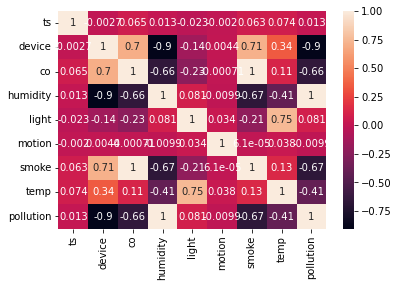

In [29]:
sns.heatmap(data5.corr(),annot=True)

Text(0, 0.5, 'humidity')

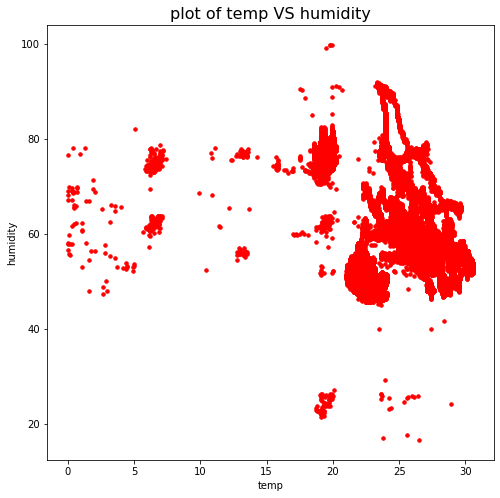

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(data['temp'],data["humidity"],s=12,c='red')
plt.title('plot of temp VS humidity',fontsize=16)
plt.xlabel('temp')
plt.ylabel('humidity')


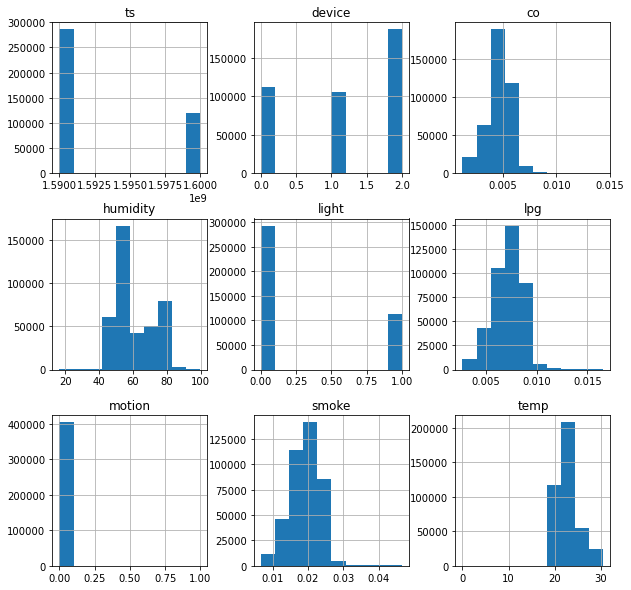

In [31]:
data.hist(figsize=(10,10))
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


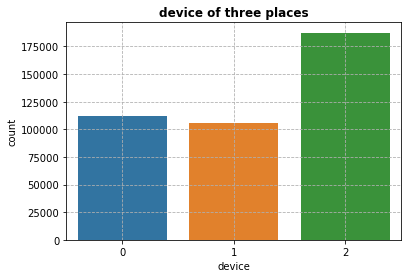

In [32]:
sns.countplot(data['device'])
plt.title('device of three places',fontweight='bold',)
plt.grid(linestyle='--')


# modelling

In [59]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405140 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ts         405140 non-null  float64
 1   device     405140 non-null  int32  
 2   co         405140 non-null  float64
 3   humidity   405140 non-null  float64
 4   light      405140 non-null  int64  
 5   motion     405140 non-null  int64  
 6   smoke      405140 non-null  float64
 7   temp       405140 non-null  float64
 8   pollution  405140 non-null  float64
dtypes: float64(6), int32(1), int64(2)
memory usage: 45.5 MB


In [60]:
data5['ts'] = data5['ts'].astype(int)
data5['co'] = data5['co'].astype(int)
data5['humidity'] = data5['humidity'].astype(int)
data5['smoke'] = data5['smoke'].astype(int)
data5['temp'] = data5['temp'].astype(int)
data5['pollution'] = data5['pollution'].astype(int)


In [61]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405140 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   ts         405140 non-null  int32
 1   device     405140 non-null  int32
 2   co         405140 non-null  int32
 3   humidity   405140 non-null  int32
 4   light      405140 non-null  int64
 5   motion     405140 non-null  int64
 6   smoke      405140 non-null  int32
 7   temp       405140 non-null  int32
 8   pollution  405140 non-null  int32
dtypes: int32(7), int64(2)
memory usage: 36.2 MB


In [ ]:
#logistic regression

In [ ]:
y=data5['temp']
x=data5.drop('temp',axis=1)
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     2     0     0     0     0     0
      0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     2     0     0     0     0     0
      0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     1     0     0     0     0     0
      0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     2     0     0     0     0     0
      0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     3     0     0     0     0     0
      0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0    21     0     0     0     0     0
      0

0.3064989880041467

In [ ]:
#KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     1     1     0     0
      0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     2     0
      0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     1     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     1     0
      0     1     0]
 [    0     0     0     0     0     1     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     2]
 [    0     0     0     0     0     5     0     0     0     0     0     0
      0     0     0    16     0     0     0     0     0     0     0     0
      0

0.5945845880436392

In [ ]:
#decision tree classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_predict=dt_model.predict(x_test)

In [70]:
accuracy_score(y_test,y_predict)

0.6614133385990029

In [71]:
confusion_matrix(y_test,y_predict)

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     1,     1,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     1,     0,     1,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     1,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     1,     0,     0,     1,     0],
       [    0,     0,     0,     0,     0,     1,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
  

In [ ]:
# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

In [ ]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
#GBC

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
accuracy_score(y_test,y_predict)

In [ ]:
confusion_matrix(y_test,y_predict)

In [ ]:
# svm 

In [ ]:
from sklearn.svm import SVC
y=data5['temp']
x=data5.drop('temp',axis=1)
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

In [ ]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)